In [1]:
#  add karna-python-backend to the path
import sys
sys.path.append('C:/Users/Prince/Documents/GitHub/Proejct-Karna/offline-ai-assistant/karna-python-backend')

from importlib import reload  # Not needed in Python 2
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

logger = logging.getLogger(__name__)

import os
import json
from typing import List
from datetime import datetime
from config.paths import workspace_data_dir, workspace_dir
from omni_helper import get_omniparser_inference_data, OmniParserResultModel
from services.screen_capture_service import ScreenshotEvent

06:13:22 INFO:NumExpr defaulting to 12 threads.


In [2]:
def run_omniparser_inference(json_file_path: str):
    logger.info(f"Loading screenshot events from JSON file: {json_file_path}")
        
    if not os.path.exists(json_file_path):
        raise FileNotFoundError(f"JSON file not found: {json_file_path}")
    
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            events_data = json.load(f)
    except json.JSONDecodeError as e:
        raise ValueError(f"Invalid JSON in file: {str(e)}")
    
    if not events_data or not isinstance(events_data, list):
        raise ValueError("JSON file does not contain a list of screenshot events")
    
    # Convert JSON data to ScreenshotEvent objects
    screenshot_events = []
    for event_dict in events_data:
        # Convert ISO format string back to datetime
        if 'timestamp' in event_dict:
            event_dict['timestamp'] = datetime.fromisoformat(event_dict['timestamp']) # type: ignore
        
        screenshot_path = event_dict["screenshot_path"]
        # convert screenshot_path to proper path using paths config
        screenshot_path = workspace_dir / screenshot_path
        event_dict["screenshot_path"] = screenshot_path
        # Create ScreenshotEvent object
        try:
            event = ScreenshotEvent(**event_dict)
            screenshot_events.append(event)
        except (TypeError, ValueError) as e:
            logger.warning(f"Skipping invalid event: {str(e)}")
    
    logger.info(f"Loaded {len(screenshot_events)} screenshot events from JSON file")
    return get_omniparser_inference_data(screenshot_events)

In [3]:

omni_inference_data : list[OmniParserResultModel] = run_omniparser_inference(os.path.join(workspace_data_dir, 
                                                                        'youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshot_events_123e4567-e89b-12d3-a456-426614174000.json'
                                                                        )).omniparser_result_models



06:13:30 INFO:Loading screenshot events from JSON file: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com/123e4567-e89b-12d3-a456-426614174000/screenshot_events_123e4567-e89b-12d3-a456-426614174000.json
06:13:30 INFO:Loaded 2 screenshot events from JSON file
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} 

Omniparser initialized!!!
image size: (1920, 1080)

0: 736x1280 123 icons, 78.1ms
Speed: 0.0ms preprocess, 78.1ms inference, 46.9ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 161 93


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


time to get parsed content: 0.6433100700378418


06:13:47 INFO:Created omniparser result for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
06:13:47 INFO:Getting omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
06:13:47 INFO:Converting parsed content df to bounding boxes for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
06:13:47 INFO:Creating omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
06:13:47 INFO:Created omniparser result model for event_id: ca65bcd4-f94b-43ee-8088-4ff9e9098b39
06:13:47 INFO:Parsing image path: C:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\data\youtube.com\123e4567-e89b-12d3-a456-426614174000\screenshots\raw\screenshot_20250305_145414_019443.png


image size: (1920, 1080)

0: 736x1280 88 icons, 66.0ms
Speed: 15.8ms preprocess, 66.0ms inference, 0.0ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 94 34


c:\Users\Prince\Documents\GitHub\Proejct-Karna\offline-ai-assistant\venv\lib\site-packages\transformers\generation\configuration_utils.py:649: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
06:13:50 INFO:Created omniparser result for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
06:13:50 INFO:Getting omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
06:13:50 INFO:Converting parsed content df to bounding boxes for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
06:13:50 INFO:Creating omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
06:13:50 INFO:Created omniparser result model for event_id: 2dde23ac-56cc-40b0-b4d7-87f04a98d245
06:13:50 INFO:Completed getting omniparser result models for 2 events


time to get parsed content: 0.6668353080749512


In [4]:
logger.info(f"Loaded {len(omni_inference_data)} omniparser result models")

06:13:50 INFO:Loaded 2 omniparser result models


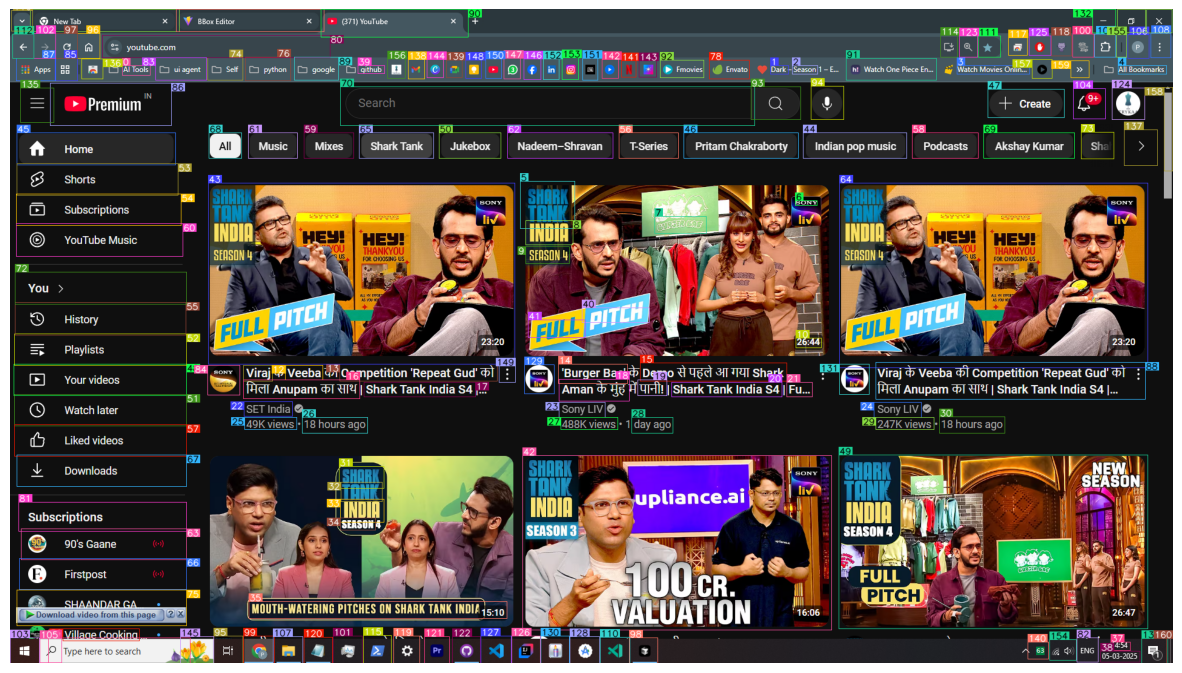

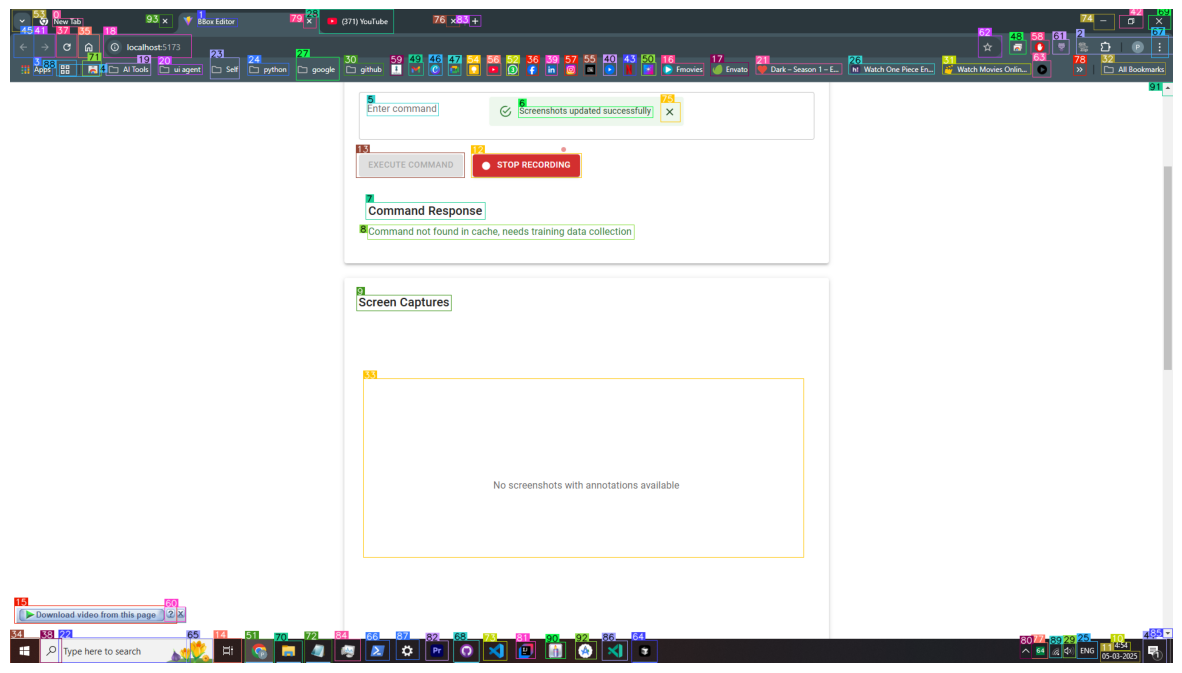

In [5]:
import base64
import matplotlib.pyplot as plt
import io
from PIL import Image
def plot_base64_image(base64_image: str):
    plt.figure(figsize=(15,15))

    image = Image.open(io.BytesIO(base64.b64decode(base64_image)))
    plt.axis('off')

    plt.imshow(image)

def plot_dino_labled_img(omniparser_result_model: OmniParserResultModel):
    plot_base64_image(omniparser_result_model.omniparser_result.dino_labled_img)
for omniparser_result_model in omni_inference_data:
    plot_dino_labled_img(omniparser_result_model)


In [6]:
for result in omni_inference_data:
    # Print each item in the parsed_content_list vertically
    for i, item in enumerate(result.parsed_content_results):
        print(f"Item {i}:")
        for key, value in item.to_dict().items():
            print(f"  {key}: {value}")
        print()  # Empty line between items

Item 0:
  type: text
  bbox: [0.0963541641831398, 0.08611111342906952, 0.12031249701976776, 0.10092592239379883]
  interactivity: False
  content: Al Tools
  source: box_ocr_content_ocr
  id: 0

Item 1:
  type: text
  bbox: [0.6536458134651184, 0.08611111342906952, 0.6692708134651184, 0.09907407313585281]
  interactivity: False
  content: Dark
  source: box_ocr_content_ocr
  id: 1

Item 2:
  type: text
  bbox: [0.6723958253860474, 0.08611111342906952, 0.6942708492279053, 0.09907407313585281]
  interactivity: False
  content: Season
  source: box_ocr_content_ocr
  id: 2

Item 3:
  type: text
  bbox: [0.8140624761581421, 0.08611111342906952, 0.8765624761581421, 0.09907407313585281]
  interactivity: False
  content: Watch Movies Onlin .
  source: box_ocr_content_ocr
  id: 3

Item 4:
  type: text
  bbox: [0.9526041746139526, 0.08611111342906952, 0.9942708611488342, 0.09907407313585281]
  interactivity: False
  content: All Bookmarks
  source: box_ocr_content_ocr
  id: 4

Item 5:
  type: te

In [7]:
# search id from parsed_content_results
def search_id_from_parsed_content_results(id: int, result: OmniParserResultModel):
    for i, item in enumerate(result.parsed_content_results):
        # print(f"Checking item {i}: id={item.id}, interactivity={item.interactivity}")
        # print(type(item.id))
        if item.id == id and item.interactivity == True:
            print(f"Found matching item: {item}")
            return item
    print("No matching item found")
    return None

result = search_id_from_parsed_content_results(135, omni_inference_data[0])
print("Returned value:")
for key, value in result.to_dict().items():
            print(f"  {key}: {value}")




Found matching item: ParsedContentResult(type='icon', bbox=[0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531], interactivity=True, content='All Sheets', source='box_yolo_content_yolo', id=135)
Returned value:
  type: icon
  bbox: [0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531]
  interactivity: True
  content: All Sheets
  source: box_yolo_content_yolo
  id: 135


In [8]:
parsed_result_item: OmniParserResultModel = omni_inference_data[0]

from omni_helper import update_omniparser_result_model
id_to_update = 135
print(f"Updating omniparser result model for id {id_to_update}")
parsed_result_item = update_omniparser_result_model(parsed_result_item, id_to_update, update_content="Menu")

new_result = search_id_from_parsed_content_results(135, omni_inference_data[0])
print("new result:  ")
for key, value in new_result.to_dict().items():
    print(f"  {key}: {value}")






Updating omniparser result model for id 135
Found matching item: ParsedContentResult(type='icon', bbox=[0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531], interactivity=True, content='Menu', source='box_yolo_content_yolo', id=135)
new result:  
  type: icon
  bbox: [0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531]
  interactivity: True
  content: Menu
  source: box_yolo_content_yolo
  id: 135


In [9]:
# append a new item to omniparser result model
from omni_helper import append_omniparser_result_model
parsed_result_item: OmniParserResultModel = omni_inference_data[0]


new_item_details = {
    "content": "Menu2",
    "bbox": [0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531],
    "interactivity": True,
    "source": "box_yolo_content_yolo",
    "type": "icon"
}

parsed_result_item = append_omniparser_result_model(parsed_result_item, 
                                                    new_item_details['content'],
                                                    new_item_details['bbox'],
                                                    new_item_details['interactivity'],
                                                    new_item_details['source'],
                                                    new_item_details['type']
                                                    )

print("Appended result:  ")
for key, value in parsed_result_item.parsed_content_results[-1].to_dict().items():
    print(f"  {key}: {value}")


Appended result:  
  type: icon
  bbox: [0.008861908689141273, 0.12109177559614182, 0.03770790621638298, 0.1731482893228531]
  interactivity: True
  content: Menu2
  source: box_yolo_content_yolo
  id: 161


In [10]:
# from omni_helper import delete_item_from_omniparser_result_model
# omni_result_item = omni_inference_data[0]
# id_to_delete = omni_result_item.parsed_content_results[-1].id
# delete_item_from_omniparser_result_model(omni_result_item, id_to_delete)
# print("Successfully deleted item with id: ", id_to_delete)


image size:  1920 1080


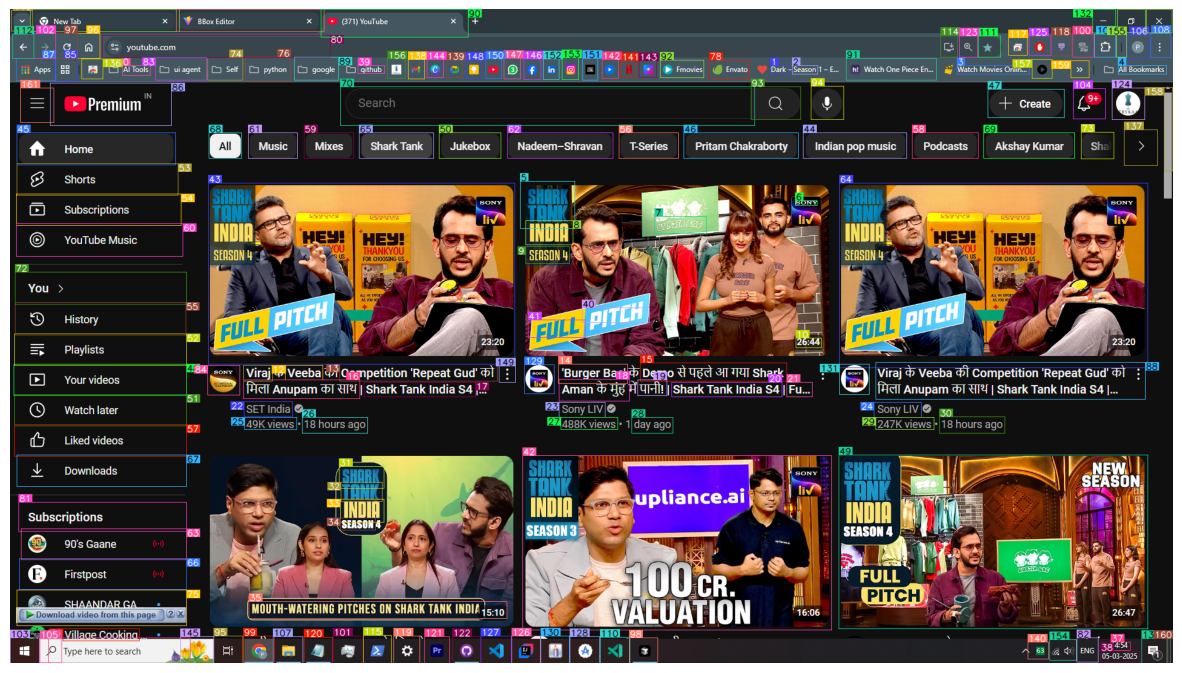

In [11]:
from omni_helper import annotate_omniparser_result_model

b64_iamge = annotate_omniparser_result_model(omni_inference_data[0])

plot_base64_image(b64_iamge)
